In [1]:
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
from qiskit.visualization import plot_state_qsphere

In [2]:
def phase_oracle(n, indices_to_mark, name = 'Oracle'):
    
    # create a qAertum circuit on n qubits
    qc = QuantumCircuit(n, name=name)

    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    
    oracle_matrix = np.identity(2**n)
    
    for i in indices_to_mark:
        oracle_matrix[i][i] = -1
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - END

    # convert your matrix (called oracle_matrix) into an operator, and add it to the quantum circuit
    qc.unitary(Operator(oracle_matrix), range(n))
    
    return qc

In [3]:
def diffuser(n):
    
    # create a quantum circuit on n qubits
    qc = QuantumCircuit(n, name='Diffuser')
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    
    qc.h(range(n))
    qc.append(phase_oracle(n, [0]), range(n))
    qc.h(range(n))
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - END
    
    return qc

In [4]:
def simulate_and_display(qc, step, it):
    sim = Aer.get_backend('statevector_simulator')
    res = execute(qc, backend=sim, shots=1).result()
    display(plot_state_qsphere(res.get_statevector(qc)))#.savefig(('./pics/out_'+step+it+'.png'))

5 qubits, basis states [2, 29] marked, 3 rounds


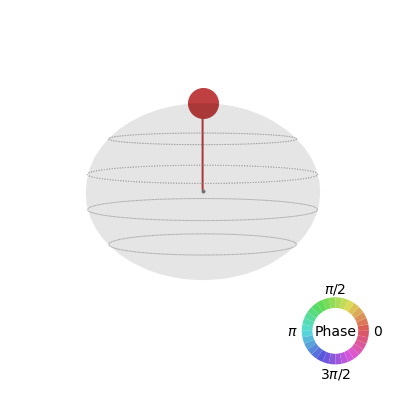

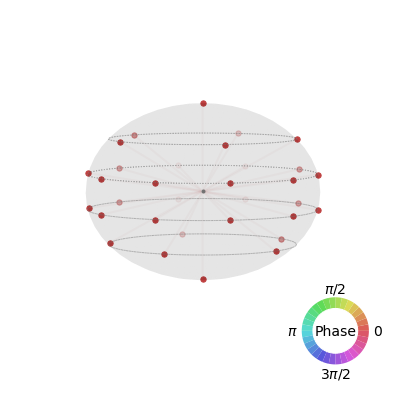

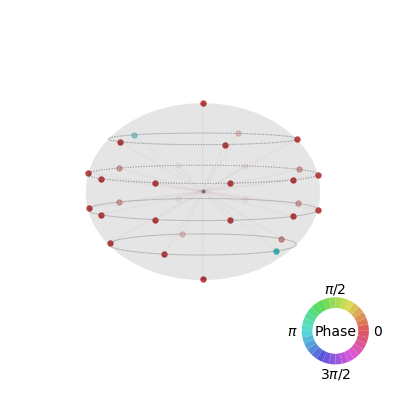

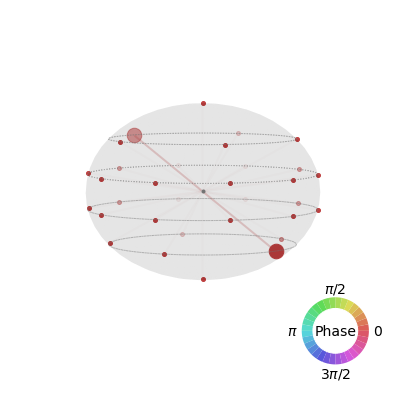

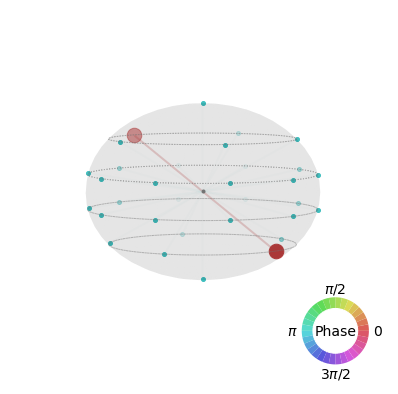

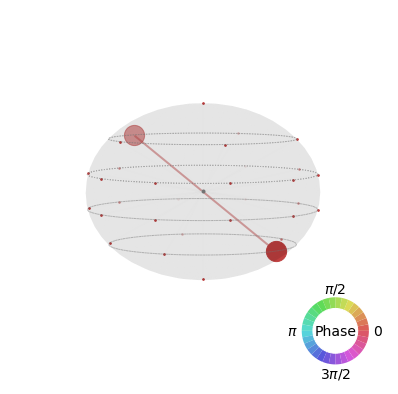

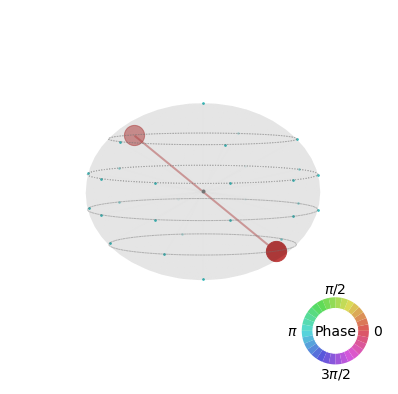

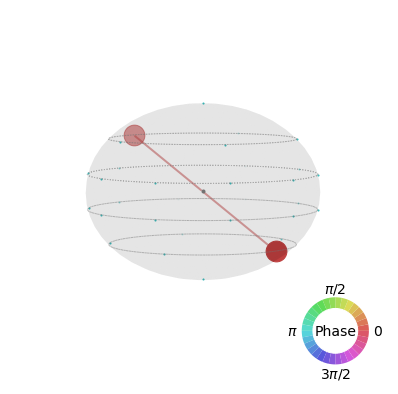

┌───┐┌─────────┐┌───────────┐┌─────────┐┌───────────┐┌─────────┐»
q_0: ┤ H ├┤0        ├┤0          ├┤0        ├┤0          ├┤0        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_1: ┤ H ├┤1        ├┤1          ├┤1        ├┤1          ├┤1        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_2: ┤ H ├┤2 Oracle ├┤2 Diffuser ├┤2 Oracle ├┤2 Diffuser ├┤2 Oracle ├»
     ├───┤│         ││           ││         ││           ││         │»
q_3: ┤ H ├┤3        ├┤3          ├┤3        ├┤3          ├┤3        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_4: ┤ H ├┤4        ├┤4          ├┤4        ├┤4          ├┤4        ├»
     └───┘└─────────┘└───────────┘└─────────┘└───────────┘└─────────┘»
c_0: ════════════════════════════════════════════════════════════════»
                                                                     »
c_1: ════════════════════════════════════════════════════════════════»
                                                                     »
c_2: ════════════════════════════════════════════════════════════════»
                                                                     »
c_3: ════════════════════════════════════════════════════════════════»
                                                                     »
c_4: ════════════════════════════════════════════════════════════════»
                                                                     »
«     ┌───────────┐┌─┐            
«q_0: ┤0          ├┤M├────────────
«     │           │└╥┘┌─┐         
«q_1: ┤1          ├─╫─┤M├─────────
«     │           │ ║ └╥┘┌─┐      
«q_2: ┤2 Diffuser ├─╫──╫─┤M├──────
«     │           │ ║  ║ └╥┘┌─┐   
«q_3: ┤3          ├─╫──╫──╫─┤M├───
«     │           │ ║  ║  ║ └╥┘┌─┐
«q_4: ┤4          ├─╫──╫──╫──╫─┤M├
«     └───────────┘ ║  ║  ║  ║ └╥┘
«c_0: ══════════════╩══╬══╬══╬══╬═
«                      ║  ║  ║  ║ 
«c_1: ═════════════════╩══╬══╬══╬═
«                         ║  ║  ║ 
«c_2: ════════════════════╩══╬══╬═
«                            ║  ║ 
«c_3: ═══════════════════════╩══╬═
«                               ║ 
«c_4: ══════════════════════════╩═
«

In [9]:
def Grover(n, indices_of_marked_elements):
    
    # Create a quantum circuit on n qubits
    qc = QuantumCircuit(n, n)
    
    # Determine r
    r = int(np.floor(np.pi/4*np.sqrt(2**n/len(indices_of_marked_elements))))
    print(f'{n} qubits, basis states {indices_of_marked_elements} marked, {r} rounds')
    
    # Display the initial state
    simulate_and_display(qc, 'init', '0')
    
    # step 1: apply Hadamard gates on all qubits
    qc.h(range(n))
    simulate_and_display(qc, 'hadamard', '0')
    
    # step 2: apply r rounds of the phase oracle and the diffuser
    for it in range(r):
        qc.append(phase_oracle(n, indices_of_marked_elements), range(n))
        simulate_and_display(qc, 'oracle', str(it))
        qc.append(diffuser(n), range(n))
        simulate_and_display(qc, 'diff', str(it))
        
    # step 3: measure all qubits
    qc.measure(range(n), range(n))
  
    return qc

mycircuit = Grover(5, [2, 29])
mycircuit.draw(output='text')

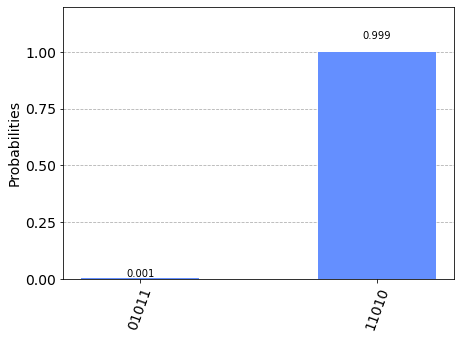

In [6]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator')
counts = execute(mycircuit, backend=simulator, shots=1000).result().get_counts(mycircuit)
from qiskit.visualization import plot_histogram
plot_histogram(counts)